In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pickle as pkl
import os, sys
import numpy as np
from os import listdir
from os.path import isfile, join
import pickle as pkl
sys.path.append("../DetResponse/")
sys.path.append("../Utils/")
sys.path.append("../PDFs/")

from Detector import *
from Plot_Histogram import *
from Signal import *

In [3]:
# Grouping Resolution:
pid = 2
path = './PreComp/EtrueSplitted/testbw/'
Etrue = np.array([])
Reso = dict()
N_Etrue = 4
for nutype in ["nu_e", "nu_mu", "nu_tau", "nu_e_bar", "nu_mu_bar", "nu_tau_bar"]:
    Reso[nutype] = dict()
    # for pid in [0,1,2]:
    for i in range(0, 100-(N_Etrue-1), N_Etrue):
        firstE = i
        lastE = i+(N_Etrue-1)
        # file = '{}RespMatrix_kde_bwadaptive_{}_pid{}_Ebin_{}_{}_weightbw.pkl'.format(path, nutype, pid, firstE, lastE)
        # file = '{}RespMatrix_kde_bwadaptive_{}_pid{}_Ebin_{}_{}_noweight.pkl'.format(path, nutype, pid, firstE, lastE)
        # file = '{}RespMatrix_kde_bwscott_{}_nopid_Ebin_{}_{}_weightbw.pkl'.format(path, nutype, firstE, lastE)
        file = '{}RespMatrix_kde_bwadaptive_{}_nopid_Ebin_{}_{}_weightbw.pkl'.format(path, nutype, firstE, lastE)


        if not isfile(file):
            print("missing: {}".format(file))
            continue
        # print("processing------------: {}".format(file))
        pkldict = pkl.load(open(file, "rb"))
        Resp = pkldict['Resp'][0][nutype]
        if nutype=='nu_e':
            Etrue = np.append(Etrue, pkldict['Bin']['true_energy_center'])
        if i==0:
            Reso[nutype] = Resp
        else:
            Reso[nutype] = np.concatenate((Reso[nutype], Resp), axis=1)
        os.remove(file)
# outfile = '{}Resolution_kde_bwscott_{}_nopid_noweight.pkl'.format(path)
outfile = '{}RespMatrix_kde_bwadaptive_nopid_weightbw.pkl'.format(path)

pkl.dump(Reso, open(outfile, "wb"))


missing: ./PreComp/EtrueSplitted/testbw/RespMatrix_kde_bwadaptive_nu_mu_nopid_Ebin_0_3_weightbw.pkl
missing: ./PreComp/EtrueSplitted/testbw/RespMatrix_kde_bwadaptive_nu_mu_nopid_Ebin_4_7_weightbw.pkl
missing: ./PreComp/EtrueSplitted/testbw/RespMatrix_kde_bwadaptive_nu_mu_nopid_Ebin_8_11_weightbw.pkl
missing: ./PreComp/EtrueSplitted/testbw/RespMatrix_kde_bwadaptive_nu_mu_nopid_Ebin_12_15_weightbw.pkl
missing: ./PreComp/EtrueSplitted/testbw/RespMatrix_kde_bwadaptive_nu_mu_nopid_Ebin_16_19_weightbw.pkl
missing: ./PreComp/EtrueSplitted/testbw/RespMatrix_kde_bwadaptive_nu_mu_nopid_Ebin_20_23_weightbw.pkl
missing: ./PreComp/EtrueSplitted/testbw/RespMatrix_kde_bwadaptive_nu_mu_nopid_Ebin_24_27_weightbw.pkl
missing: ./PreComp/EtrueSplitted/testbw/RespMatrix_kde_bwadaptive_nu_mu_nopid_Ebin_28_31_weightbw.pkl
missing: ./PreComp/EtrueSplitted/testbw/RespMatrix_kde_bwadaptive_nu_mu_nopid_Ebin_32_35_weightbw.pkl
missing: ./PreComp/EtrueSplitted/testbw/RespMatrix_kde_bwadaptive_nu_mu_nopid_Ebin_36_3

In [3]:
# properly normalize the rersolution:
for nutype in ["nu_e", "nu_mu", "nu_tau", "nu_e_bar", "nu_mu_bar", "nu_tau_bar"]:
    nonnumber = np.array([])
    Reso_norm = np.zeros(Reso[nutype].shape)
    for iE in range(0, 100):
        for ipsi in range(0, 50):
            temp = Reso[nutype][ipsi, iE, 0:18, 0:50]
            if np.sum(temp) == 0: 
                print("warning")
                print("iE {}, ipsi {}".format(iE, ipsi))
                continue
            # testsum = 0
            for jE in range(0, 50):
                for jpsi in range(0, 18):
                    Reso_norm[ipsi, iE, jpsi, jE] = Reso[nutype][ipsi, iE, jpsi, jE]/np.sum(temp)
    Reso[nutype] = Reso_norm

In [4]:
Reso['Bin'] = dict()
Reso['Bin']['true_psi_center'] = pkldict['Bin']['true_psi_center']
Reso['Bin']['reco_psi_center'] = pkldict['Bin']['reco_psi_center']
Reso['Bin']['true_energy_center'] = Etrue
Reso['Bin']['reco_energy_center'] = pkldict['Bin']['reco_energy_center']


In [6]:
outfile = './PreComp/Resolution_kde_bwscott_nopid.pkl'
pkl.dump(Reso, open(outfile, "wb"))

In [8]:
Reso.keys()

dict_keys(['nu_e', 'nu_mu', 'nu_tau', 'nu_e_bar', 'nu_mu_bar', 'nu_tau_bar', 'Bin'])

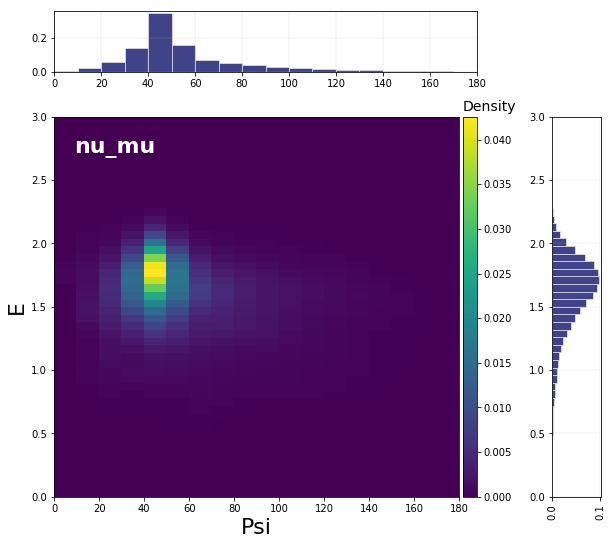

In [7]:
test = Reso['nu_mu'][12, 10, 0:18, 0:50]
plot_projections(test, (pkldict['Bin']['reco_psi_edges'], np.log10(pkldict['Bin']['reco_energy_edges']))
    , x_label='Psi', y_label=('E'), title='nu_mu')

In [1]:
# channel = 'nunu'
channel = 'numunumu'

mass = 200
# Binning:
# E true
Etrue_center = np.linspace(1., mass, 100)
Ewidth = (mass-1.)/(100.-1.)
Etrue_edges = np.array([E - Ewidth/2. for E in Etrue_center])
Etrue_edges = np.append(Etrue_edges, Etrue_center[-1] + Ewidth/2.)
# Psi true
Psitrue_edges = np.linspace(0, 180, 51)
Psiwidth = 180./50.
Psitrue_center = np.array([Psitrue_edges[i]+Psiwidth/2. for i in range(len(Psitrue_edges)-1)])
# E reco
Ereco_edges = pow(10., np.linspace(np.log10(1.), np.log10(1e3), 50+1))
Ereco_center = np.array([np.sqrt(Ereco_edges[i]*Ereco_edges[i+1]) for i in range(len(Ereco_edges) - 1)])
# Psi reco
Psireco_edges = np.linspace(0., 180., 18+1)
Psireco_center = np.array( [(Psireco_edges[i]+Psireco_edges[i+1])/2. for i in range(len(Psireco_edges)-1)] )

# PID
PID_edges = np.array([0.,0.5,0.85,1.])
PID_center = np.array( [(PID_edges[i]+PID_edges[i+1])/2. for i in range(len(PID_edges)-1)] )

Bin_eval = GroupBinning(Etrue_edges, Psitrue_edges, Etrue_center, Psitrue_center,
                Ereco_edges, Psireco_edges, Ereco_center, Psireco_center, PID_edges, PID_center)

NameError: name 'np' is not defined

In [20]:

# Extract precompute spectra
pathSpectra="/data/user/tchau/Sandbox/GC_OscNext/Spectra/PreComp/Spectra_ann_Charon_atEarth_nocut.pkl"

# pathSpectra="/data/user/tchau/Sandbox/GC_OscNext/Spectra/PreComp/Spectra_ann_PPPC4_atEarth.pkl"


# Precomputed Jfactor:
pathJfactor="/data/user/tchau/Sandbox/GC_OscNext/Spectra/PreComp/JFactor_NFW.pkl"
# True spectra:
Jfactor = Interpolate_Jfactor(pathJfactor, Psitrue_center)
# Spectra:
Spectra = Interpolate_Spectra(pathSpectra, Etrue_center, channel, mass)


# Compute the rate as Spectra x Jfactor
Rate = TrueRate(Spectra, Jfactor)
Rate['nu_mu'].shape

(50, 100)

In [21]:
grid = dict()
grid['true_energy_center'] = Etrue
grid['true_psi_center'] = pkldict['Bin']['true_psi_center']
grid['reco_energy_center'] = pkldict['Bin']['reco_energy_center']
grid['reco_psi_center'] = pkldict['Bin']['reco_psi_center']

In [22]:
# Interpolate to get response matrix at desired point:
Reso_int = InterpolateResponseMatrix(Reso['nu_mu'], grid, Bin_eval)
Reso_int.shape

(50, 100, 18, 50)

In [23]:
Eff = pkl.load(open("./PreComp/EtrueSplitted/eff/EffArea_kde_bwscott_nu_mu_nopid_Etrue_0_99.pkl", "rb"))
Eff_int = RegularGrid_2D((grid["true_psi_center"], grid["true_energy_center"]), Eff['Eff'], (Bin_eval["true_psi_center"], Bin_eval["true_energy_center"]))


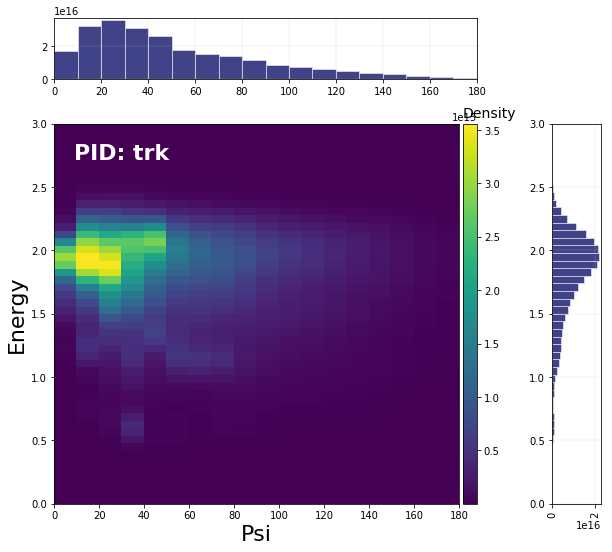

In [24]:
Rateeff = Eff_int * Rate['nu_e']
RecoRate = np.tensordot(Reso_int, Rateeff, axes=([0,1], [0,1]))
plot_projections(RecoRate, np.array([Psireco_edges, np.log10(Ereco_edges)]), "Psi", "Energy", "PID: trk")

ValueError: shape mismatch: objects cannot be broadcast to a single shape

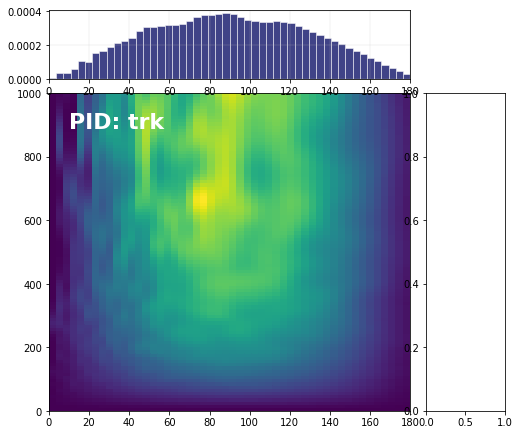

In [54]:
plot_projections(Eff['Eff'], 
    np.array([pkldict['Bin']['true_psi_edges'], Etrue]), "Psi", "Energy", "PID: trk")

In [52]:
Eff['Eff'].shape

(50, 100)